#🐼 Sandbox for pandas

Play with the pandas data analysis library for Python.

[Setup](#setup)

[Input](#input)

[DataFrames](#df)
- [Anatomy](#dfy)
- [Basic analysis](#dfa)

[Explore](#explore)
- [Grouping](#group)
- [Value counts](#counts)
- [Filtering](#filters)
- [Pivot tables](#pivot)

[Output](#output)

[Plotting](#plot)


###Setup<a id="setup"></a>

If you have [Anaconda](https://www.continuum.io/downloads) installed, it includes all the packages you'll need to import. 

If you aren't using Anaconda, download and install the following packages via pip with  `pip install [packagename]`  

- [pandas](http://pandas.pydata.org): a data analysis library.
- [numpy](http://www.numpy.org/): pandas is built on top of numpy, a Python extension for working with arrays and math.
- [matplotlib](http://matplotlib.org/): a plotting library that plays well with pandas DataFrames and numpy arrays.

In [165]:
# import pandas with the nickname pd
import pandas as pd
# import numpy with the nickname np. 
import numpy as np
# import matplotlib with the the pyplot toolbox with the nickname plt. 
import matplotlib.pyplot as plt
# make plots appear inline
%matplotlib inline

###Input<a id="input"></a>

Read the workshop data csv into a pandas DataFrame using `read_csv`.

A DataFrame is a tabular data structure. It's the workhorse of pandas. A DataFrame has row and column indexes and enables data alignment, selection, grouping, pivot tables, reshaping, and more. The nickname for DataFrame is 'df'.

`read_excel`, `read_sql_table`, and `read_html` are a few examples of the formats you can read into pandas. 



In [71]:
# read in your data 
df = pd.read_csv('sample_mods_scores.csv')

###DataFrames<a id="df"></a>

####Explore the anatomy of a DataFrame<a id="dfy"></a>

You’ll see that pandas automatically assumes the first row of csv data is a header row.

`head()` is a nice way of quickly checking how your data has read in. By default it shows the first five rows, but you can change the number to suit your needs. `head(10)` will show the first ten rows. 

In [72]:
# see the top rows of your dataframe
df.head()

,uuid,division,collection,title,typeOfResource,genre,date,identifier,location,total
0,5db7ad80-c52a-012f-0a4c-3c075448cc4b,Lionel Pincus and Princess Firyal Map Division,Maps of North America.,1,1,0,1,1,1,5
1,d7cac480-c52a-012f-b006-3c075448cc4b,Lionel Pincus and Princess Firyal Map Division,Maps of North America.,1,1,0,1,1,1,5
2,05a920b0-c52b-012f-bd3f-3c075448cc4b,Lionel Pincus and Princess Firyal Map Division,Maps of North America.,1,1,1,1,1,1,6
3,4f409800-c52b-012f-29cb-3c075448cc4b,Lionel Pincus and Princess Firyal Map Division,Maps of North America.,1,1,0,1,1,1,5
4,b8d50ee0-c52b-012f-0ac7-58d385a7bc34,Manuscripts and Archives Division,NYWF Index Card Collection,1,1,0,0,0,1,3


`tail()` shows the last rows of your DataFrame. It also defaults to five rows but can be updated. 

In [73]:
# see the last rows of your DataFrame
df.tail()

,uuid,division,collection,title,typeOfResource,genre,date,identifier,location,total
10736,dadfbd70-c60c-012f-fa64-58d385a7bc34,Manuscripts and Archives Division,NYWF Index Card Collection,1,1,0,0,0,1,3
10737,df97baf0-c60c-012f-dc5a-58d385a7bc34,Dorot Jewish Division,"Yizkor Book Collection -- deprecated, old stru...",1,1,1,0,1,1,5
10738,e443de40-c60c-012f-5b52-58d385a7bc34,"The Miriam and Ira D. Wallach Division of Art,...",Changing New York,1,1,0,1,1,1,5
10739,e97912d0-c60c-012f-b87b-58d385a7bc34,Dorot Jewish Division,"Yizkor Book Collection -- deprecated, old stru...",1,1,1,0,1,1,5
10740,ee99c880-c60c-012f-8beb-58d385a7bc34,"The Miriam and Ira D. Wallach Division of Art,...",Changing New York,1,1,0,1,1,1,5


You can also return a range of specific rows using numeric indices with `iloc()`

In [74]:
# return specific rows using numeric indices
df.iloc[3713:3716]

,uuid,division,collection,title,typeOfResource,genre,date,identifier,location,total
3713,ec448970-c55b-012f-e39d-58d385a7bc34,Carl H. Pforzheimer Collection of Shelley and ...,Shelley and his Circle [manuscripts],1,1,0,0,0,1,3
3714,ef7c1270-c55b-012f-72d7-58d385a7bc34,Irma and Paul Milstein Division of United Stat...,"Photographic views of New York City, 1870's-19...",1,1,1,1,1,1,6
3715,f294f790-c55b-012f-751c-58d385a7bc34,Art and Picture Collection,Mid-Manhattan Picture Collection,1,1,0,1,1,1,5


Take a look at your DataFrame without `head()`, `tail()`, or `iloc()`. 

In [111]:
df

,uuid,division,collection,title,typeOfResource,genre,date,identifier,location,total
0,5db7ad80-c52a-012f-0a4c-3c075448cc4b,Lionel Pincus and Princess Firyal Map Division,Maps of North America.,1,1,0,1,1,1,5
1,d7cac480-c52a-012f-b006-3c075448cc4b,Lionel Pincus and Princess Firyal Map Division,Maps of North America.,1,1,0,1,1,1,5
2,05a920b0-c52b-012f-bd3f-3c075448cc4b,Lionel Pincus and Princess Firyal Map Division,Maps of North America.,1,1,1,1,1,1,6
3,4f409800-c52b-012f-29cb-3c075448cc4b,Lionel Pincus and Princess Firyal Map Division,Maps of North America.,1,1,0,1,1,1,5
4,b8d50ee0-c52b-012f-0ac7-58d385a7bc34,Manuscripts and Archives Division,NYWF Index Card Collection,1,1,0,0,0,1,3
5,c55fe1b0-c52b-012f-904b-58d385a7bc34,George Arents Collection,Cigarette cards,1,1,1,0,1,1,5
6,d188b580-c52b-012f-b33f-58d385a7bc34,George Arents Collection,Cigarette cards,1,1,1,0,1,1,5
7,dd8be660-c52b-012f-5e86-58d385a7bc34,Manuscripts and Archives Division,NYWF Index Card Collection,1,1,0,0,0,1,3
8,ea454890-c52b-012f-f1b1-58d385a7bc34,George Arents Collection,Cigarette cards,1,1,1,1,1,1,6
9,a1fab0f0-c52b-012f-d0e9-3c075448cc4b,Lionel Pincus and Princess Firyal Map Division,Maps of North America.,1,1,0,1,1,1,5


With long DataFrames, pandas defaults to showing the first 30 and last 30 rows. The rest of the data is truncated, which is noted in a row with ellipses. 

`head()` has been added to some examples in this notebook to save scrolling. Please remove/modify as needed!

####Basic data analysis <a id="dfa"></a>

Get an overview of your data out of the gate. 

`info()` provides a DataFrame summary. It's a nice overview to confirm that pandas is accurately reading in your data. Here, you can see that the csv was read in as a DataFrame. 

In [160]:
# get summary information about your DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10741 entries, 0 to 10740
Data columns (total 10 columns):
uuid              10741 non-null object
division          10741 non-null object
collection        10741 non-null object
title             10741 non-null int64
typeOfResource    10741 non-null int64
genre             10741 non-null int64
date              10741 non-null int64
identifier        10741 non-null int64
location          10741 non-null int64
total             10741 non-null int64
dtypes: int64(7), object(3)
memory usage: 923.1+ KB


`describe()` displays a basic set of statistical information about your DataFrame. It runs statistics on all numeric values and omits strings. 

In [161]:
# check out basic statistics
df.describe()

,title,typeOfResource,genre,date,identifier,location,total
count,10741,10741.000000,10741.000000,10741.000000,10741.000000,10741.000000,10741.000000
mean,1,0.999628,0.732613,0.288893,0.666884,0.998976,4.686994
std,0,0.019295,0.442616,0.453269,0.471350,0.031987,0.917128
min,1,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,1,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000
75%,1,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
max,1,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


###Explore your data <a id="explore"></a>

<a id="group"></a>**Grouping data** helps to surface patterns.

`groupby()` is one of several ways to group data in pandas. 

The example below uses `agg()` to pass in any combination of functions. In the following example, we have the total record count count per division and the mean total score. 

In [162]:
# total scores grouped by division
totalscores_by_division = df.groupby('division')
totalscores_by_division['total'].agg([len, np.mean])

,len,mean
division,,
Art and Picture Collection,403,4.841191
Billy Rose Theatre Division,499,4.470942
Carl H. Pforzheimer Collection of Shelley and His Circle,183,3.191257
Children's Center at 42nd St,1,4.000000
Dorot Jewish Division,2671,4.997005
General Research Division,412,4.351942
George Arents Collection,1319,5.040182
Henry W. and Albert A. Berg Collection of English and American Literature,37,5.135135
"Irma and Paul Milstein Division of United States History, Local History and Genealogy",496,5.606855


Let's look at a particular name from the grouped DataFrame with the `get_group()` function.

In [163]:
# total scores within a specific division in the group
totalscores_by_division.get_group('General Research Division').head()

,uuid,division,collection,title,typeOfResource,genre,date,identifier,location,total
127,5953eef0-c52f-012f-aaf7-58d385a7bc34,General Research Division,The Vinkhuijzen collection of military uniforms,1,1,0,0,1,1,4
141,89efc280-c52f-012f-342d-58d385a7bc34,General Research Division,The Vinkhuijzen collection of military uniforms,1,1,1,0,1,1,5
161,d60ad300-c52f-012f-2fdc-58d385a7bc34,General Research Division,The Vinkhuijzen collection of military uniforms,1,1,0,1,1,1,5
168,e8e03de0-c52f-012f-ffc5-58d385a7bc34,General Research Division,The Vinkhuijzen collection of military uniforms,1,1,1,1,1,1,6
178,04d9d400-c530-012f-adf9-58d385a7bc34,General Research Division,The Vinkhuijzen collection of military uniforms,1,1,1,1,1,1,6


<a id="counts"></a>**`value_counts()`** is a straightforward way to see counts of a particular value—in this case, our assessment scores.

In [164]:
# check identifier scores
df.identifier.value_counts()

1    7163
0    3578
dtype: int64

<a id="filters"></a>**Filtering**

Analyze specific aspects of your data with filtering

There are filter functions built into pandas, but starting out it’s easy to use this dictionary syntax to apply a simple filter. 

In [84]:
# return the number of records missing a date element
print 'how many records are missing date element?'
nodates = df[(df.date == 0.0)]
print len(nodates)

how many records are missing date element?
7638


You can create more specific filters using a boolean operation

In [105]:
# return the number of records missing a date element that have an identifier element
print 'how many records missing a date element have an identifier element?'
nodates_with_ids = df[(df.date == 0.0) & (df.identifier == 1.0)]
print len(nodates_with_ids)

how many records missing a date element have an identifier element?
4771


Now, let's take a closer look at the records returned with this filter. 

It would probably be useful to see what collections these records in. Let's generate a list of the records without a date element that have an identifier element. 

In [139]:
# get all missing dates with collection and uuid info
df[df['date'] == 0.0][df['identifier'] == 1.0][['uuid','collection']].head()

,uuid,collection
5,c55fe1b0-c52b-012f-904b-58d385a7bc34,Cigarette cards
6,d188b580-c52b-012f-b33f-58d385a7bc34,Cigarette cards
12,2a7d2370-c52c-012f-f6fa-58d385a7bc34,Cigarette cards
19,7a901040-c52c-012f-de56-58d385a7bc34,Cigarette cards
20,86890560-c52c-012f-dbeb-58d385a7bc34,Cigarette cards


<a id="pivot"></a>**Pivot tables**

Another way to group data is by using the pandas `pivot_table` function. 

A pivot table uses one set of data values 'pivoted' around another set of data values to provide different views of the source data. You may be familiar with pivot tables from using Excel. In pandas, the result is an Excel-like pivot table in a DataFrame structure. 

`fill_value` replaces missing values with a specified value. Here, let's replace missing values with '0'.

In [140]:
# this table pivots identifier scores by division
dates_table = pd.pivot_table(df,index=['division'],columns=['date'], aggfunc={'date':len},fill_value=0)
dates_table

date  \
date                                                                                                     0   
division                                                                                                     
Art and Picture Collection                                                                              80   
Billy Rose Theatre Division                                                                            276   
Carl H. Pforzheimer Collection of Shelley and His Circle                                               168   
Children's Center at 42nd St                                                                             0   
Dorot Jewish Division                                                                                 2642   
General Research Division                                                                              335   
George Arents Collection                                                                              1254   
Henry W. and Albert A. Berg Collection of English and American Literature                                8   
Irma and Paul Milstein Division of United States History, Local History and Genealogy                  142   
Jerome Robbins Dance Division                                                                           17   
Lionel Pincus and Princess Firyal Map Division                                                          69   
Manuscripts and Archives Division                                                                     1450   
Music Division                                                                                          64   
New York Public Library Archives                                                                        14   
Null                                                                                                     1   
Rare Book Division                                                                                      31   
Schomburg Center for Research in Black Culture, Manuscripts, Archives and Rare Books Division            0   
Schomburg Center for Research in Black Culture, Photographs and Prints Division                         12   
Schomburg General Research and Reference Division                                                        0   
Science, Industry and Business Library: General Collection                                               0   
Slavic and East European Collections                                                                     0   
Spencer Collection                                                                                       5   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Art & Architecture Collection     0   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Photography Collection          294   
The Miriam and Ira D. Wallach Division of Art, Prints and Photographs: Print Collection                776   

                                                                                                           
date                                                                                                    1  
division                                                                                                   
Art and Picture Collection                                                                            323  
Billy Rose Theatre Division                                                                           223  
Carl H. Pforzheimer Collection of Shelley and His Circle                                               15  
Children's Center at 42nd St                                                                            1  
Dorot Jewish Division                                                                                  29  
General Research Division                                                                              77  
George Arents Collection                         

###Output<a id="output"></a>

You can export your data to a number of different formats from pandas. 

This is helpful for large tables, or if you need your data in another format to perform a remediation task, or if you simply need results fast and are more comfortable working in Excel.

Here's a large table with identifier scores by collection. 

In [159]:
ids_by_coll = pd.pivot_table(df,index=['collection'],columns=['identifier'],aggfunc={'identifier':len},fill_value=0)
ids_by_coll

identifier  \
identifier                                                                                                                                                                                                                                                                                                                                                                            0   
collection                                                                                                                                                                                                                                                                                                                                                                                
A. G. Spalding Baseball Collection                                                                                                                                                                                                                                                                                                                                                    0   
Account of the capture of Recife                                                                                                                                                                                                                                                                                                                                                      1   
Alexander Anderson scrapbooks                                                                                                                                                                                                                                                                                                                                                        17   
Allgemeine Naturgeschichte der Fische. French = Ichtylogie, ou Histoire naturelle : generale et particuliere des poissons                                                                                                                                                                                                                                                             0   
Almanack for ....                                                                                                                                                                                                                                                                                                                                                                     0   
American popular songs.                                                                                                                                                                                                                                                                                                                                                              69   
Atlases of New York City                                                                                                                                                                                                                                                                                                                                                              6   
Atlases of the United States                                                                                                                                                                                                                                                                                                                                                         65   
Atlases, gazetteers, guidebooks and other books                                                                                                                                                     

You can write this table to a csv using `to_csv`.

`to_excel`, `to_json`, and `to_html` are a few examples of the formats you can output from pandas. 

In [ ]:
# export your data as a csv file
ids_by_collection.to_csv('ids_by_coll.csv')

###Plotting<a id="plot"></a>

The pandas DataFrame plot() function is a matplotlib wrapper. Here are some basic examples of plotting pandas data. 

Make a pie chart. `figsize` needs to be even to make a circle rather than an oval. 

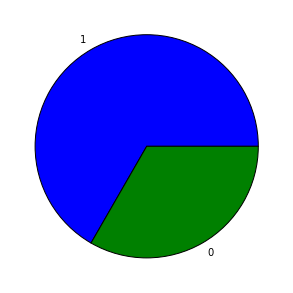

In [153]:
# make a pie chart of identifier value counts
ids_table = df.identifier.value_counts()
ids_table.plot(kind='pie', figsize=(5, 5))

Make a stacked bar chart. 

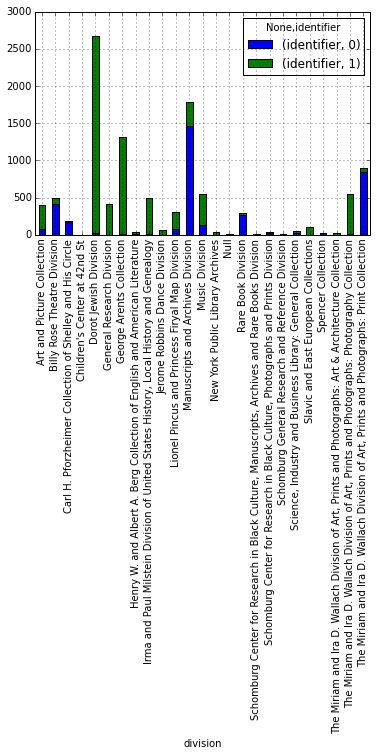

In [152]:
# create a stacked bar chart plotting identifier score counts by division
ids_table = pd.pivot_table(df,index=['division'],columns=['identifier'], aggfunc={'identifier':len},fill_value=0)
idscoresplot = ids_table.plot(kind='bar', stacked=True)

Make a bar chart.

`ascending=False` will order from highest to lowest values. Use `set_xlabel` and `set_ylabel` to specify axis labels.

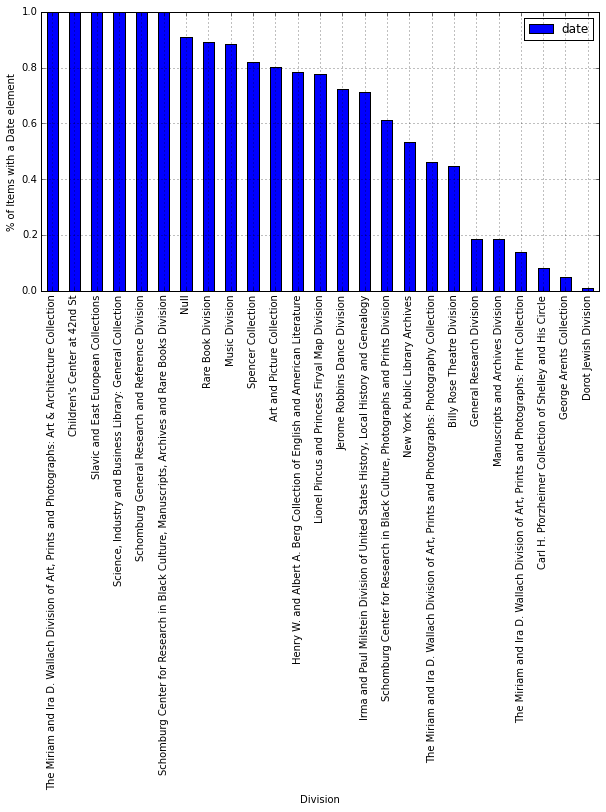

In [158]:
# create a bar chart viewing mean date scores by division
dates_by_division = df[['date', 'division']].groupby('division')
mean_dates_by_division = dates_by_division.mean()
dates_plot = mean_dates_by_division.sort(columns='date', ascending=False).plot(kind='bar', figsize=(10,5))
dates_plot.set_xlabel('Division')
dates_plot.set_ylabel('% of Items with a Date element')